In [1]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization

In [2]:
os.getcwd()

'C:\\Users\\Avijith'

In [5]:
Categories=['star','galaxy']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir=r"C:\Users\Avijith\OneDrive\Desktop\Far Far Away\B1 stars and galaxies\B1 miniproject\Dataset"
flat_data = np.load(os.path.join(datadir, 'flat_data.npy'))
target = np.load(os.path.join(datadir, 'target.npy'))
x = []  # Initialize an empty list to store image data
for category in Categories:
    category_path = os.path.join(datadir, category)
    for img_file in os.listdir(category_path):
        img_array = imread(os.path.join(category_path, img_file))
        x.append(img_array)  # Append the image array to the list

x = np.array(x)


In [6]:
df = pd.DataFrame(flat_data)
df['Target'] = target
df.shape

(3986, 67501)

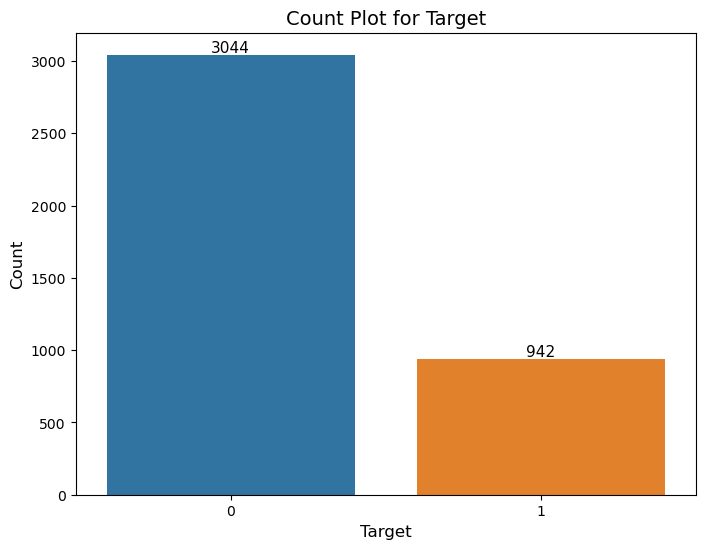

In [7]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Target')
plt.xlabel('Target', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count Plot for Target', fontsize=14)

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [8]:
#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
3981    1
3982    1
3983    1
3984    1
3985    1
Name: Target, Length: 3986, dtype: int32

In [9]:
y_one_hot = tf.keras.utils.to_categorical(y, num_classes=len(Categories))

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y_one_hot, test_size=0.20, random_state=77)

In [11]:
model = Sequential()

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid'))  # Output layer with 2 neurons and softmax activation

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)      

In [15]:
x_train_array = x_train.to_numpy()
x_test_array = x_test.to_numpy()

# Preprocess the data (normalize and reshape)
x_train_preprocessed = x_train_array.reshape(-1, 150, 150, 3) / 255.0  # Normalize pixel values
x_test_preprocessed = x_test_array.reshape(-1, 150, 150, 3) / 255.0


In [16]:
history = model.fit(x_train_preprocessed, y_train, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
90/90 [==============================] - 68s 706ms/step - loss: 0.5616 - accuracy: 0.7368 - val_loss: 0.6158 - val_accuracy: 0.7555
Epoch 2/10
90/90 [==============================] - 62s 689ms/step - loss: 0.4470 - accuracy: 0.7839 - val_loss: 6.6911 - val_accuracy: 0.2445
Epoch 3/10
90/90 [==============================] - 62s 687ms/step - loss: 0.3782 - accuracy: 0.8240 - val_loss: 2.7233 - val_accuracy: 0.7555
Epoch 4/10
90/90 [==============================] - 62s 684ms/step - loss: 0.3162 - accuracy: 0.8616 - val_loss: 2.1522 - val_accuracy: 0.7555
Epoch 5/10
90/90 [==============================] - 61s 682ms/step - loss: 0.2849 - accuracy: 0.8784 - val_loss: 3.2439 - val_accuracy: 0.7555
Epoch 6/10
90/90 [==============================] - 61s 681ms/step - loss: 0.2436 - accuracy: 0.8961 - val_loss: 7.5461 - val_accuracy: 0.2445
Epoch 7/10
90/90 [==============================] - 62s 689ms/step - loss: 0.2160 - accuracy: 0.9108 - val_loss: 3.2705 - val_accuracy: 0.7555

In [17]:
accuracy = model.evaluate(x_test_preprocessed, y_test)[1] * 100
print("Test Accuracy:", accuracy)

25/25 [==============================] - 5s 195ms/step - loss: 9.6014 - accuracy: 0.1980
Test Accuracy: 19.799499213695526


25/25 [==============================] - 5s 195ms/step


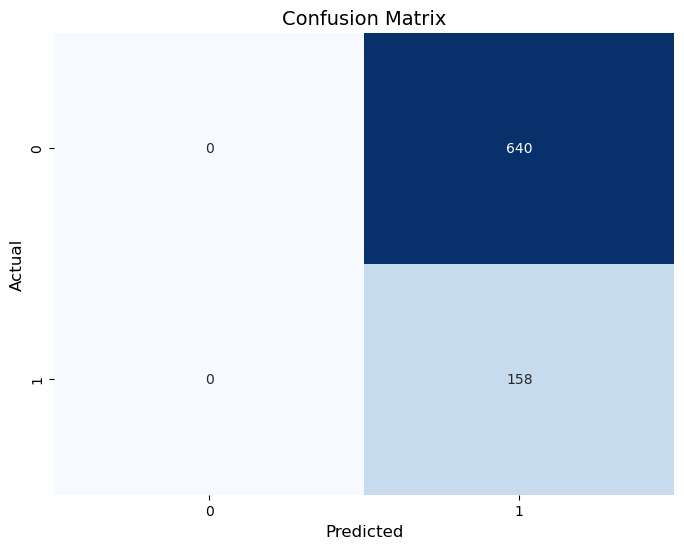

In [18]:
from sklearn.metrics import confusion_matrix

# Convert one-hot encoded y_test to integer format
y_test_classes = np.argmax(y_test, axis=1)

# Assuming you have trained and evaluated your model and have predictions
y_pred = model.predict(x_test_preprocessed)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()


In [19]:
from sklearn.metrics import classification_report

# Convert one-hot encoded y_test to integer format
y_test_classes = np.argmax(y_test, axis=1)

# Assuming you have trained and evaluated your model and have predictions
y_pred = model.predict(x_test_preprocessed)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=Categories)
print(report)


25/25 [==============================] - 5s 190ms/step
              precision    recall  f1-score   support

        star       0.00      0.00      0.00       640
      galaxy       0.20      1.00      0.33       158

    accuracy                           0.20       798
   macro avg       0.10      0.50      0.17       798
weighted avg       0.04      0.20      0.07       798



C:\Users\Avijith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Avijith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Avijith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


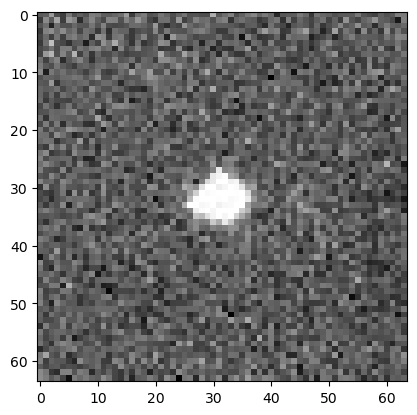

1/1 [==============================] - 0s 62ms/step
The predicted image is: galaxy


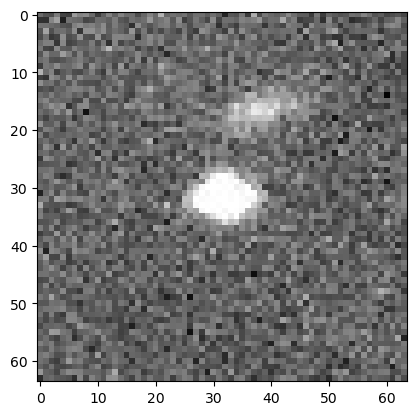

1/1 [==============================] - 0s 51ms/step
The predicted image is: galaxy


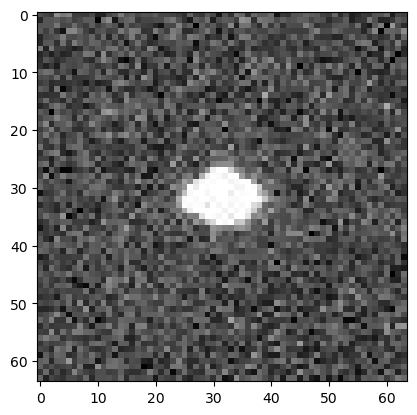

1/1 [==============================] - 0s 60ms/step
The predicted image is: galaxy


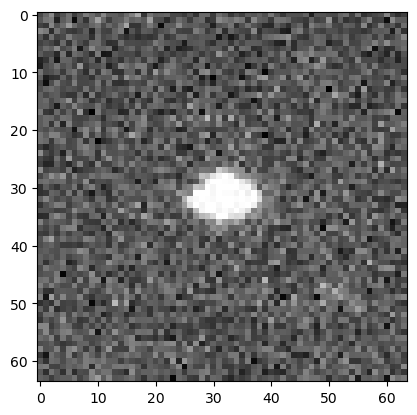

1/1 [==============================] - 0s 52ms/step
The predicted image is: galaxy


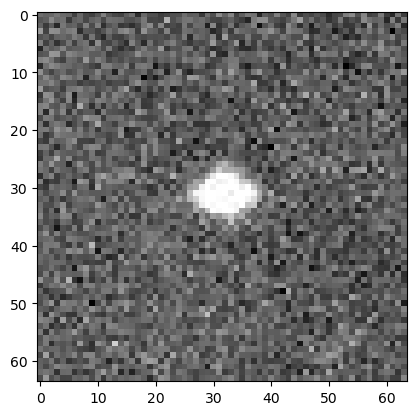

1/1 [==============================] - 0s 92ms/step
The predicted image is: galaxy


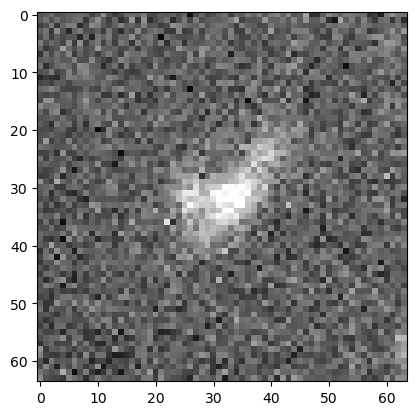

1/1 [==============================] - 0s 53ms/step
The predicted image is: galaxy


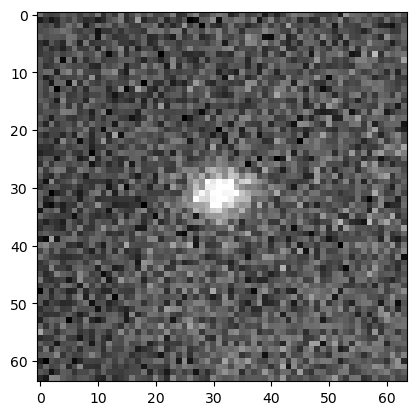

1/1 [==============================] - 0s 58ms/step
The predicted image is: galaxy


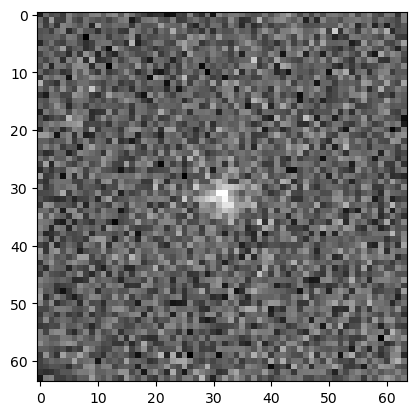

1/1 [==============================] - 0s 57ms/step
The predicted image is: galaxy


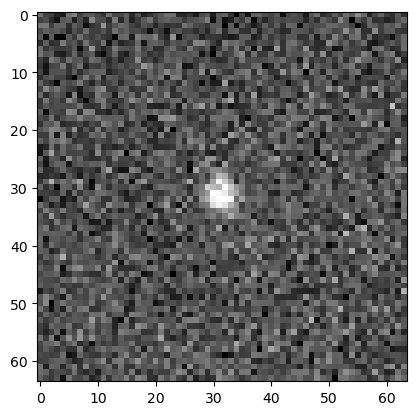

1/1 [==============================] - 0s 51ms/step
The predicted image is: galaxy


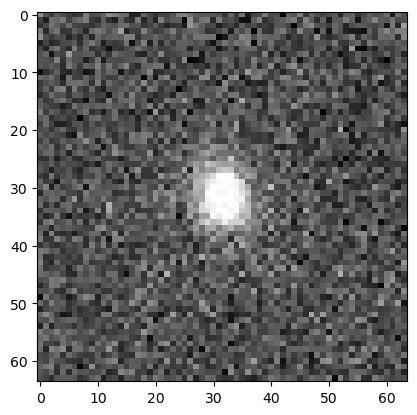

1/1 [==============================] - 0s 54ms/step
The predicted image is: galaxy


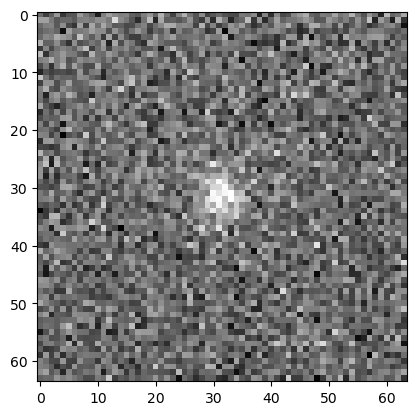

1/1 [==============================] - 0s 63ms/step
The predicted image is: galaxy


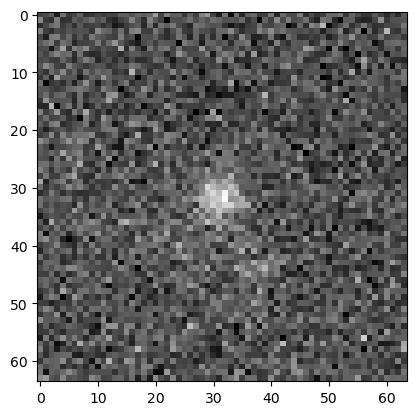

1/1 [==============================] - 0s 59ms/step
The predicted image is: galaxy


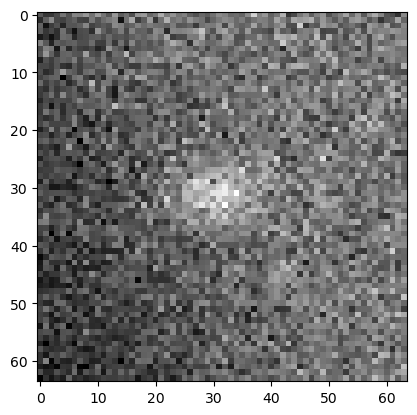

1/1 [==============================] - 0s 60ms/step
The predicted image is: galaxy


In [21]:
# Define the path to the test images directory
path = r"C:\Users\Avijith\OneDrive\Desktop\Far Far Away\B1 stars and galaxies\B1 miniproject\test images"

# Define the categories with corresponding labels
Categories = {0: 'star', 1: 'galaxy'}

# Iterate through the test images directory
for filename in os.listdir(path):
    img_path = os.path.join(path, filename)  # Construct the complete image path
    img = imread(img_path)
    
    plt.imshow(img)
    plt.show()
    
    img_resize = resize(img, (150, 150, 3))
    img_preprocessed = img_resize / 255.0  # Normalize pixel values
    
    # Reshape the preprocessed image for prediction
    img_reshaped = img_preprocessed.reshape(-1, 150, 150, 3)
    
    # Make predictions using your pre-trained CNN model
    prediction_probs = model.predict(img_reshaped)
    predicted_category = Categories[np.argmax(prediction_probs)]
    
    print("The predicted image is:", predicted_category)